## Data Import & Preprocessing ---
### Load dataset, handle missing values, and prepare features & target

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/stock_data_july_2025.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4346 non-null   object 
 1   Ticker          4346 non-null   object 
 2   Open Price      4346 non-null   float64
 3   Close Price     4346 non-null   float64
 4   High Price      4346 non-null   float64
 5   Low Price       4346 non-null   float64
 6   Volume Traded   4346 non-null   int64  
 7   Market Cap      4346 non-null   float64
 8   PE Ratio        4346 non-null   float64
 9   Dividend Yield  4346 non-null   float64
 10  EPS             4346 non-null   float64
 11  52 Week High    4346 non-null   float64
 12  52 Week Low     4346 non-null   float64
 13  Sector          4346 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 475.5+ KB


In [4]:
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,2025-06-01,AAPL,185.96,187.79,188.85,183.74,42257183,2.931356e+12,28.37,0.49,6.62,248.20,155.68,Technology
1,2025-06-01,ABBV,189.63,193.64,194.31,188.03,33074970,3.289227e+11,16.74,3.51,11.57,210.83,127.91,Healthcare
2,2025-06-01,ABT,118.79,120.08,120.53,118.01,17130934,2.001333e+11,19.39,1.84,6.19,140.79,99.26,Healthcare
3,2025-06-01,ADBE,584.51,567.78,587.97,561.25,11080360,2.460380e+11,43.29,0.00,13.12,727.11,407.82,Technology
4,2025-06-01,ADP,253.46,255.60,258.59,249.91,10319559,1.052471e+11,29.92,2.04,8.54,303.75,234.28,Financials


In [5]:
df['Sector'].value_counts()

,count
Sector,
Healthcare,954
Technology,795
Financials,795
Consumer Discretionary,371
Industrials,371
Consumer Staples,371
Communication Services,318
Utilities,159
Real Estate,106


Bars = counting/comparing groups

Histograms = showing how numbers spread

Boxplots = spotting oddballs

Lines = showing change over time

Scatter = showing if two numbers are linked

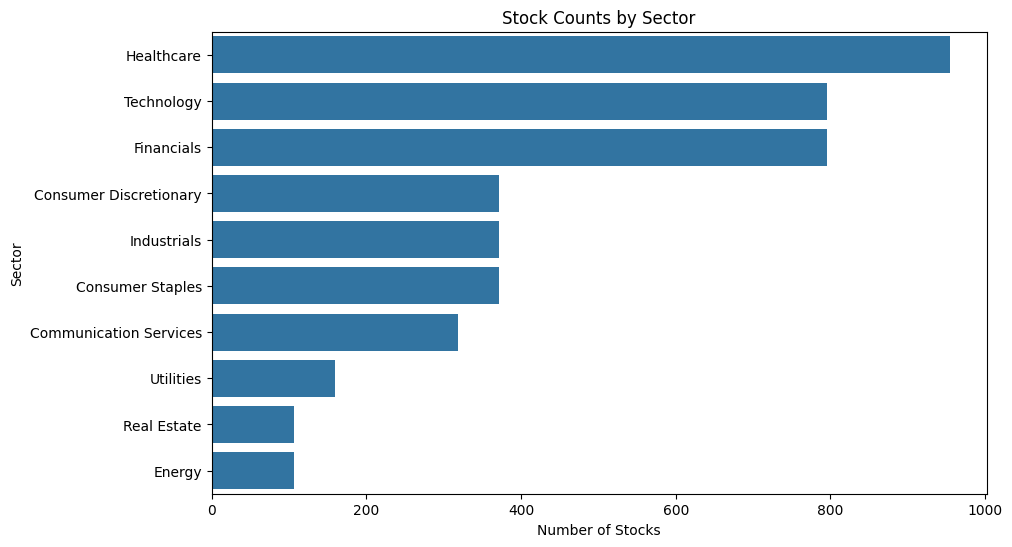

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Sector', order=df['Sector'].value_counts().index)
plt.title('Stock Counts by Sector')
plt.xlabel('Number of Stocks')
plt.ylabel('Sector')
plt.show()

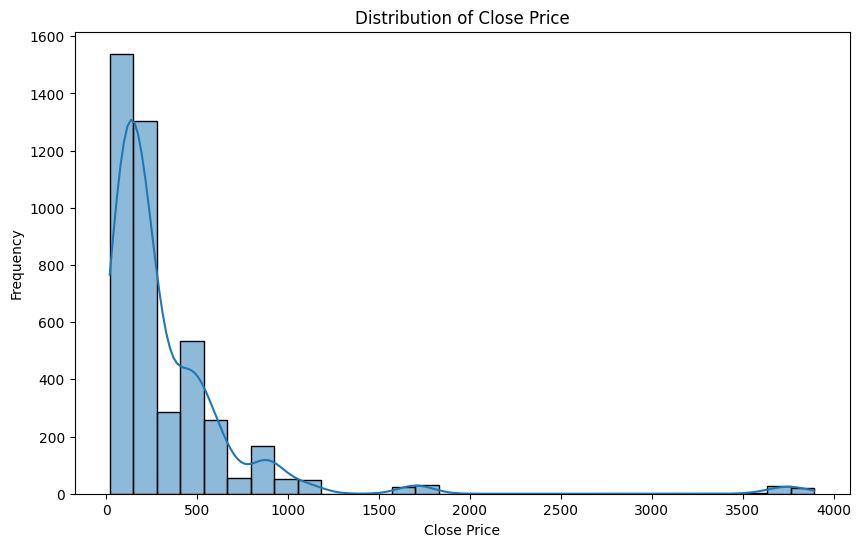

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['Close Price'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


In [8]:
missing_count = df.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64


In [9]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


In [10]:
df.shape

(4346, 14)

In [11]:
df.dtypes

,0
Date,object
Ticker,object
Open Price,float64
Close Price,float64
High Price,float64
Low Price,float64
Volume Traded,int64
Market Cap,float64
PE Ratio,float64
Dividend Yield,float64


In [12]:
# outlier detection
num_columns = df.select_dtypes(include='number').columns.to_list()

In [13]:
import pandas as pd

outlier_summary = {}

for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    # Count outliers
    outlier_count = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()

    # Save percentage
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_summary[col] = round(outlier_percentage, 2)

# Convert to DataFrame for nice viewing
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier %'])
outlier_df = outlier_df.sort_values(by='Outlier %', ascending=False)

print(outlier_df)


            Column  Outlier %
5       Market Cap      12.20
8              EPS       8.17
4    Volume Traded       5.82
10     52 Week Low       5.45
9     52 Week High       4.95
6         PE Ratio       4.53
0       Open Price       4.07
3        Low Price       4.07
1      Close Price       3.96
2       High Price       3.91
7   Dividend Yield       2.02


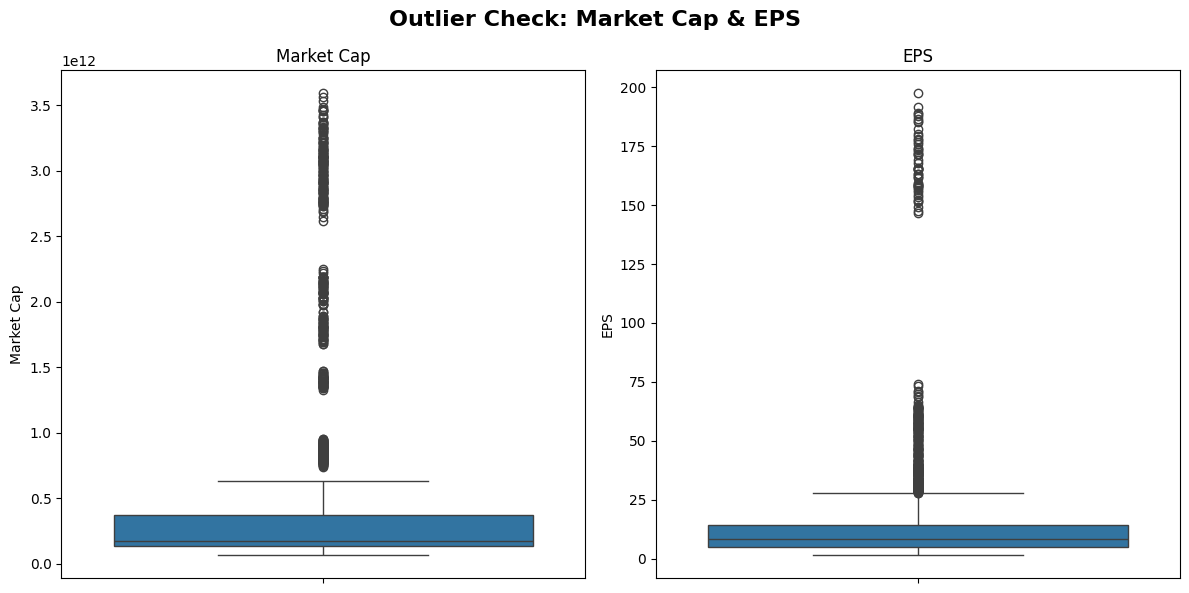

In [14]:
plt.figure(figsize=(12, 6))
plt.suptitle("Outlier Check: Market Cap & EPS", fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
sns.boxplot(y=df['Market Cap'])
plt.title('Market Cap')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['EPS'])
plt.title('EPS')

plt.tight_layout()
plt.show()

# plt.subplot(rows, columns, position)


In [15]:
Q1 = df['Market Cap'].quantile(0.25)
Q3 = df['Market Cap'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

market_cap_outliers = df[(df['Market Cap'] < lower_limit) | (df['Market Cap'] > upper_limit)]
market_cap_outliers[['Ticker', 'Market Cap']].sort_values(by='Market Cap', ascending=False).head(10)

,Ticker,Market Cap
4018,AAPL,3.589151e+12
3936,AAPL,3.562146e+12
328,AAPL,3.529054e+12
984,AAPL,3.482537e+12
1230,AAPL,3.469893e+12
1886,AAPL,3.465366e+12
3608,AAPL,3.465366e+12
3690,AAPL,3.458654e+12
1968,AAPL,3.457873e+12
2378,AAPL,3.424780e+12


In [16]:
Q1 = df['EPS'].quantile(0.25)
Q3 = df['EPS'].quantile(0.75)
IQR = Q3 -Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
eps_df = df[(df['EPS']<lower_limit)|(df['EPS']>upper_limit)]
eps_df[['Ticker','EPS']].sort_values(by='EPS',ascending = False).head(10)

,Ticker,EPS
1569,BKNG,197.37
1897,BKNG,191.80
4111,BKNG,189.16
913,BKNG,188.48
1159,BKNG,187.70
2553,BKNG,186.50
1487,BKNG,185.56
2225,BKNG,185.12
2061,BKNG,182.07
831,BKNG,180.19


In [17]:
df.describe()

,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low
count,4346.000000,4346.000000,4346.000000,4346.000000,4.346000e+03,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,337.837002,337.907635,343.086233,332.737186,1.658002e+07,4.027126e+11,25.581173,1.807835,13.693049,410.097975,266.144823
std,472.650926,472.769476,479.915872,465.653353,1.522197e+07,6.202114e+11,12.923249,1.557671,20.268110,575.709969,377.470429
min,19.040000,18.990000,19.410000,18.900000,2.003906e+06,6.469973e+10,6.850000,0.000000,1.560000,21.130000,13.670000
25%,110.797500,110.527500,112.187500,109.292500,7.491280e+06,1.313524e+11,16.820000,0.470000,5.140000,130.547500,83.862500
50%,196.925000,195.915000,199.960000,193.745000,1.187239e+07,1.738019e+11,22.900000,1.800000,8.470000,235.125000,152.095000
75%,448.885000,451.100000,457.435000,443.027500,2.087384e+07,3.714750e+11,30.307500,2.767500,14.265000,531.735000,338.062500
max,3848.170000,3894.270000,3923.200000,3810.020000,8.996302e+07,3.589151e+12,97.700000,7.760000,197.370000,5069.750000,3529.240000


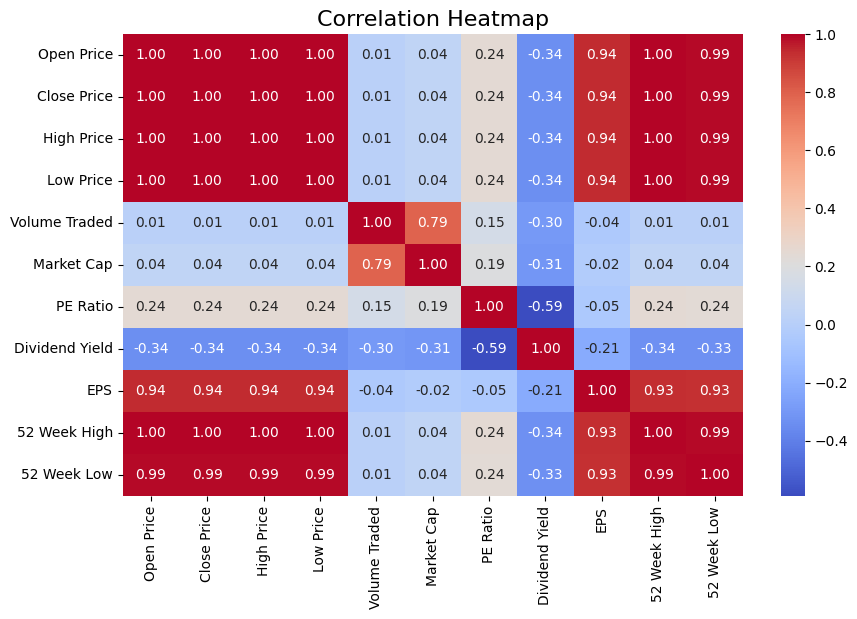

In [18]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [19]:
cols_to_drop = ['Open Price', 'High Price', 'Low Price', '52 Week Low']

# Drop the columns from the dataframe
df = df.drop(columns=cols_to_drop)

# Check the remaining columns
print("Remaining columns after dropping redundant ones:")
print(df.columns)

Remaining columns after dropping redundant ones:
Index(['Date', 'Ticker', 'Close Price', 'Volume Traded', 'Market Cap',
       'PE Ratio', 'Dividend Yield', 'EPS', '52 Week High', 'Sector'],
      dtype='object')


In [20]:
df.head(5)

,Date,Ticker,Close Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,Sector
0,2025-06-01,AAPL,187.79,42257183,2.931356e+12,28.37,0.49,6.62,248.20,Technology
1,2025-06-01,ABBV,193.64,33074970,3.289227e+11,16.74,3.51,11.57,210.83,Healthcare
2,2025-06-01,ABT,120.08,17130934,2.001333e+11,19.39,1.84,6.19,140.79,Healthcare
3,2025-06-01,ADBE,567.78,11080360,2.460380e+11,43.29,0.00,13.12,727.11,Technology
4,2025-06-01,ADP,255.60,10319559,1.052471e+11,29.92,2.04,8.54,303.75,Financials


In [21]:
df.dtypes

,0
Date,object
Ticker,object
Close Price,float64
Volume Traded,int64
Market Cap,float64
PE Ratio,float64
Dividend Yield,float64
EPS,float64
52 Week High,float64
Sector,object


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Quarter'] = df['Date'].dt.quarter

In [23]:
df = pd.get_dummies(df, columns=['Sector', 'Ticker'], drop_first=False)


In [24]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)



In [25]:
print(df.head())

        Date  Close Price  Volume Traded    Market Cap  PE Ratio  \
0 2025-06-01       187.79       42257183  2.931356e+12     28.37   
1 2025-06-01       193.64       33074970  3.289227e+11     16.74   
2 2025-06-01       120.08       17130934  2.001333e+11     19.39   
3 2025-06-01       567.78       11080360  2.460380e+11     43.29   
4 2025-06-01       255.60       10319559  1.052471e+11     29.92   

   Dividend Yield    EPS  52 Week High  Month  Day  ...  Ticker_UBER  \
0            0.49   6.62        248.20      6    1  ...            0   
1            3.51  11.57        210.83      6    1  ...            0   
2            1.84   6.19        140.79      6    1  ...            0   
3            0.00  13.12        727.11      6    1  ...            0   
4            2.04   8.54        303.75      6    1  ...            0   

   Ticker_UNH  Ticker_UNP  Ticker_UPS  Ticker_V  Ticker_VRTX  Ticker_VZ  \
0           0           0           0         0            0          0   
1       

In [26]:
print(list(df.columns))


['Date', 'Close Price', 'Volume Traded', 'Market Cap', 'PE Ratio', 'Dividend Yield', 'EPS', '52 Week High', 'Month', 'Day', 'Weekday', 'Quarter', 'Sector_Communication Services', 'Sector_Consumer Discretionary', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Healthcare', 'Sector_Industrials', 'Sector_Real Estate', 'Sector_Technology', 'Sector_Utilities', 'Ticker_AAPL', 'Ticker_ABBV', 'Ticker_ABT', 'Ticker_ADBE', 'Ticker_ADP', 'Ticker_AMD', 'Ticker_AMGN', 'Ticker_AMT', 'Ticker_AMZN', 'Ticker_AVGO', 'Ticker_BAC', 'Ticker_BKNG', 'Ticker_BLK', 'Ticker_BMY', 'Ticker_BRK.B', 'Ticker_C', 'Ticker_CAT', 'Ticker_CB', 'Ticker_COST', 'Ticker_CRM', 'Ticker_CVX', 'Ticker_DIS', 'Ticker_DUK', 'Ticker_ELV', 'Ticker_GE', 'Ticker_GILD', 'Ticker_GOOGL', 'Ticker_GS', 'Ticker_HD', 'Ticker_HON', 'Ticker_IBM', 'Ticker_INTC', 'Ticker_INTU', 'Ticker_ISRG', 'Ticker_JNJ', 'Ticker_JPM', 'Ticker_KO', 'Ticker_LLY', 'Ticker_LMT', 'Ticker_LOW', 'Ticker_MA', 'Ticker_MDLZ', 'Ticker_MDT', 'Ticke

In [27]:
df = df.drop(columns=['Date'])


In [28]:
df.head(2)

,Close Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,Month,Day,Weekday,...,Ticker_UBER,Ticker_UNH,Ticker_UNP,Ticker_UPS,Ticker_V,Ticker_VRTX,Ticker_VZ,Ticker_WMT,Ticker_XOM,Ticker_ZTS
0,187.79,42257183,2.931356e+12,28.37,0.49,6.62,248.20,6,1,6,...,0,0,0,0,0,0,0,0,0,0
1,193.64,33074970,3.289227e+11,16.74,3.51,11.57,210.83,6,1,6,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split and Feature Scaling

In [29]:
df['Market_Cap_per_Volume'] = df['Market Cap'] / df['Volume Traded']
df['PE_to_EPS'] = df['PE Ratio'] / (df['EPS'] + 1e-5)
df['High_Dividend'] = (df['Dividend Yield'] > 2).astype(int)

In [30]:
print(df.head())

   Close Price  Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
0       187.79       42257183  2.931356e+12     28.37            0.49   6.62   
1       193.64       33074970  3.289227e+11     16.74            3.51  11.57   
2       120.08       17130934  2.001333e+11     19.39            1.84   6.19   
3       567.78       11080360  2.460380e+11     43.29            0.00  13.12   
4       255.60       10319559  1.052471e+11     29.92            2.04   8.54   

   52 Week High  Month  Day  Weekday  ...  Ticker_UPS  Ticker_V  Ticker_VRTX  \
0        248.20      6    1        6  ...           0         0            0   
1        210.83      6    1        6  ...           0         0            0   
2        140.79      6    1        6  ...           0         0            0   
3        727.11      6    1        6  ...           0         0            0   
4        303.75      6    1        6  ...           0         0            0   

   Ticker_VZ  Ticker_WMT  Ticker_XOM  

##  Linear Regression Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features & target
X = df.drop(columns=['Close Price'])
y = df['Close Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [32]:
# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 178.9125348161069
R²: 0.9992792757896791


In [34]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)


         Feature  Coefficient
31   Ticker_BKNG   293.913509
29   Ticker_AVGO   122.152655
1     Market Cap    78.328960
81   Ticker_REGN    68.154677
38   Ticker_COST    55.963135
..           ...          ...
90   Ticker_TSLA   -31.280466
46  Ticker_GOOGL   -32.282315
70    Ticker_NKE   -33.624099
28   Ticker_AMZN   -50.298443
20   Ticker_AAPL   -55.267981

[105 rows x 2 columns]


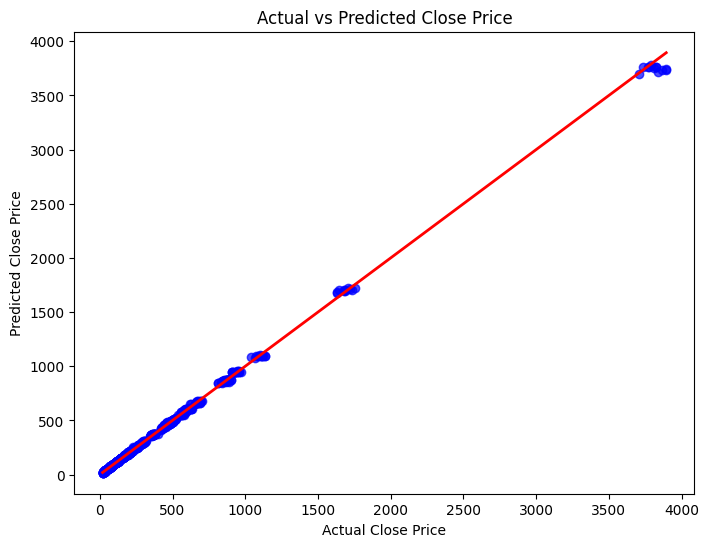

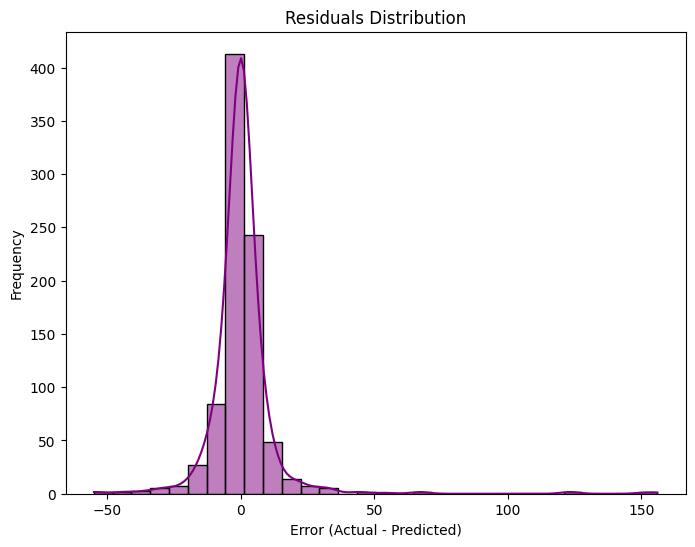

In [35]:
# Plot Actual vs Predicted Close Price
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)  # reference line
plt.show()

# Residuals plot (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


## Random Forest Model

Random Forest MSE: 68.06553858382095
Random Forest R²: 0.9997258074645451
                           Feature  Importance
5                     52 Week High    0.679020
4                              EPS    0.105705
31                     Ticker_BKNG    0.094460
103                      PE_to_EPS    0.089031
11   Sector_Consumer Discretionary    0.011592
29                     Ticker_AVGO    0.005147
3                   Dividend Yield    0.004672
2                         PE Ratio    0.004591
18               Sector_Technology    0.002958
1                       Market Cap    0.001543


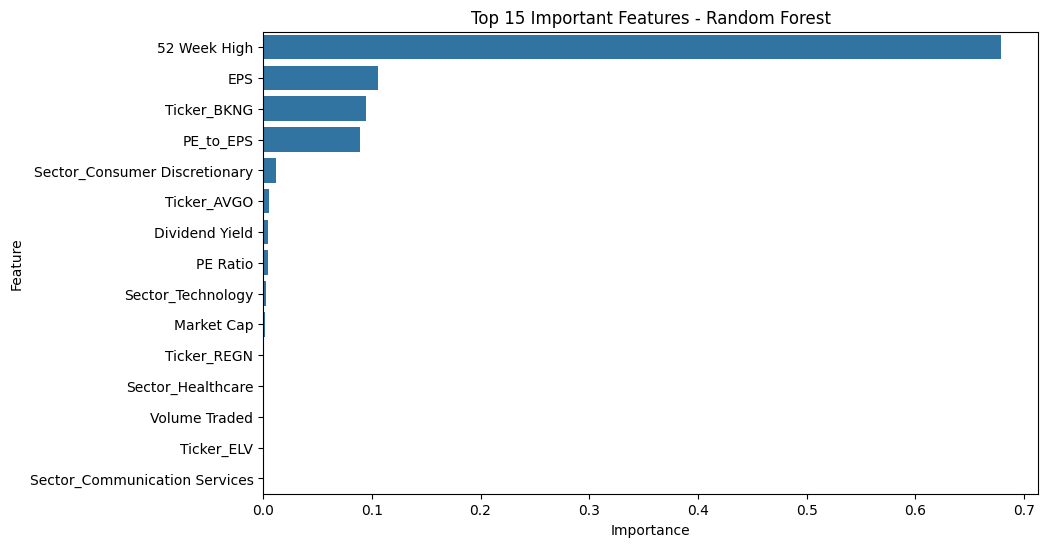

In [36]:
# Random forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let it grow fully
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Metrics
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
print("Random Forest R²:", r2_score(y_test, rf_preds))

# Feature Importance
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_importance.head(10))

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15))
plt.title("Top 15 Important Features - Random Forest")
plt.show()


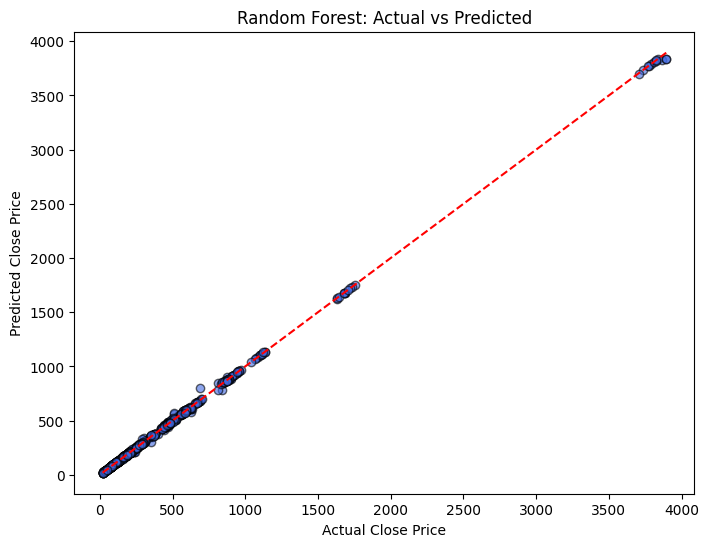

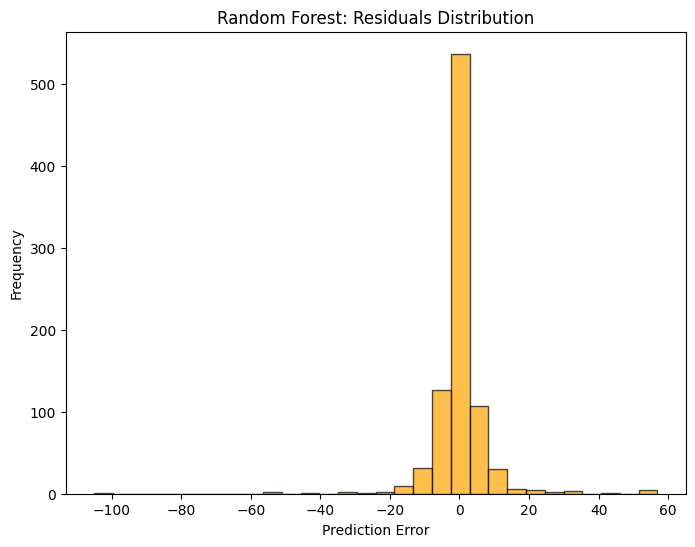

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# Residuals Histogram
residuals = y_test - rf_preds
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Random Forest: Residuals Distribution")
plt.show()


## Comparision Between Linear Regression and Random Forest Models

In [41]:
#  Compare Models (Linear Regression vs Random Forest)
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [mean_squared_error(y_test, y_pred),
            mean_squared_error(y_test, rf_preds)],
    'R²': [r2_score(y_test, y_pred),
           r2_score(y_test, rf_preds)]
})

print("Model Performance Comparison:")
print(results)

#  Identify best model
best_model = results.loc[results['R²'].idxmax(), 'Model']
print(f"\n Best Model: {best_model}")

#  Make a sample prediction from test set
sample = X_test[0].reshape(1, -1)  # pick the first row
if best_model == 'Random Forest':
    pred_price = rf_model.predict(sample)[0]
else:
    pred_price = model.predict(sample)[0]

print("\nSample Prediction:")
print(f"Actual Close Price: {y_test.iloc[0]}")
print(f"{best_model} Predicted Price: {pred_price:.2f}")

#  Final Conclusion for Report
print(f"\nConclusion: Based on the R² score, the {best_model} model shows better predictive performance for our stock price dataset. "
      "This model can be further improved with hyperparameter tuning and more feature engineering.")


Model Performance Comparison:
               Model         MSE        R²
0  Linear Regression  178.912535  0.999279
1      Random Forest   68.065539  0.999726

 Best Model: Random Forest

Sample Prediction:
Actual Close Price: 85.08
Random Forest Predicted Price: 83.20

Conclusion: Based on the R² score, the Random Forest model shows better predictive performance for our stock price dataset. This model can be further improved with hyperparameter tuning and more feature engineering.
